In [1]:
import pandas as pd
from constants import TEMP_PATH, MIMIC_PATH

ADMISSION_DATA_COLS = ["subject_id", "hadm_id", "marital_status", "race"]
PERSONAL_DATA_COLS = ["subject_id", "gender", "anchor_age"]
MESURE_DATA_COLS = ['hadm_id', 'stay_id', 'charttime', "itemid", "valuenum"]

## Filter Patients

In [2]:
from constants import DKA_CODE_V9, DKA_CODE_V10, CKD5_CODE_V9, CKD5_CODE_V10

dfDiagnose = pd.read_csv(str(MIMIC_PATH / "hosp" / "diagnoses_icd.csv"))

### DKA

In [3]:
dkaCondition = (
    (dfDiagnose["icd_version"] == 9)
    & dfDiagnose["icd_code"].isin(DKA_CODE_V9)
) | (
    (dfDiagnose["icd_version"] == 10)
    & (dfDiagnose["icd_code"].isin(DKA_CODE_V10))
)

dfDka = dfDiagnose[dkaCondition]
dfDka

,subject_id,hadm_id,seq_num,icd_code,icd_version
922,10002013,21763296,2,E1110,10
6459,10012942,25710228,1,25013,9
8468,10015860,25085565,2,25012,9
9580,10018862,29501040,3,E1110,10
11494,10023239,21759936,2,E1010,10
...,...,...,...,...,...
4730603,19942407,29950646,1,25012,9
4731345,19944287,24067633,2,25013,9
4731358,19944287,24212516,3,25013,9
4751027,19989302,21980453,1,E1110,10


### exclude CKD stage 5 

In [4]:
ckd5Condition = (
    (dfDiagnose["icd_version"] == 9)
    & dfDiagnose["icd_code"].isin(CKD5_CODE_V9)
) | (
    (dfDiagnose["icd_version"] == 10)
    & dfDiagnose["icd_code"].isin(CKD5_CODE_V10)
)

dfCkd5 = dfDiagnose[ckd5Condition]

dfTargetDiagnose = dfDka[
    ~dfDka["hadm_id"].isin(dfCkd5["hadm_id"])
]

dfTargetDiagnose

,subject_id,hadm_id,seq_num,icd_code,icd_version
922,10002013,21763296,2,E1110,10
6459,10012942,25710228,1,25013,9
8468,10015860,25085565,2,25012,9
9580,10018862,29501040,3,E1110,10
11494,10023239,21759936,2,E1010,10
...,...,...,...,...,...
4730603,19942407,29950646,1,25012,9
4731345,19944287,24067633,2,25013,9
4731358,19944287,24212516,3,25013,9
4751027,19989302,21980453,1,E1110,10


### icu admission

In [8]:
dfIcu = pd.read_csv(MIMIC_PATH / "icu" / "icustays.csv", parse_dates=["intime"])
dfIcu = dfIcu[
    dfIcu["hadm_id"].isin(dfTargetDiagnose["hadm_id"])
]

dfIcuSorted = dfIcu.sort_values(["hadm_id", "intime"])
dfIcuSorted.to_csv(TEMP_PATH / "icu_target.csv")
dfIcuSorted

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
67846,19277038,20027438,30213832,Surgical Intensive Care Unit (SICU),Medical Intensive Care Unit (MICU),2119-04-07 22:09:11,2119-04-09 18:37:49,1.853218
54144,17405009,20041225,32710335,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2181-05-02 01:43:08,2181-05-02 18:13:35,0.687813
66317,19054290,20046699,30643955,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2194-10-07 08:49:00,2194-10-09 06:46:48,1.915139
69568,19523386,20053996,32939862,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2167-03-29 11:24:00,2167-03-31 17:49:33,2.267743
6679,10924444,20065893,31555593,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2167-04-27 04:21:00,2167-04-28 22:58:25,1.775984
...,...,...,...,...,...,...,...,...
10249,11389314,29991667,30620060,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2184-09-24 03:06:00,2184-09-24 23:10:11,0.836238
15651,12136570,29992577,31780258,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2147-06-13 23:30:00,2147-06-18 15:12:56,4.654815
15652,12136570,29992577,31918815,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2147-06-20 00:28:44,2147-06-20 22:35:52,0.921620
15653,12136570,29992577,37754345,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2147-06-23 05:27:15,2147-06-27 18:58:46,4.563553


## Mergin data

In [9]:
dfPatient = pd.read_csv(TEMP_PATH / "icu_target.csv", usecols=["hadm_id", "stay_id"])
dfPatient.drop_duplicates(subset="stay_id", keep="first", inplace=True)
dfPatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   hadm_id  1304 non-null   int64
 1   stay_id  1304 non-null   int64
dtypes: int64(2)
memory usage: 20.5 KB


In [3]:
from constants import MIMIC_PATH


dfPatientAdmission = pd.read_csv(MIMIC_PATH / "hosp" / "admissions.csv", usecols=ADMISSION_DATA_COLS)
dfPatientPersonal = pd.read_csv(MIMIC_PATH / "hosp" / "patients.csv", usecols=PERSONAL_DATA_COLS)

dfPatientInfo = pd.merge(dfPatientAdmission, dfPatientPersonal, on="subject_id")
del dfPatientAdmission
del dfPatientPersonal

dfPatientInfo.drop(columns="subject_id", inplace=True)
dfPatientInfo["marital_status"] = dfPatientInfo["marital_status"].astype("category")
dfPatientInfo["race"] = dfPatientInfo["race"].astype("category")
dfPatientInfo["gender"] = dfPatientInfo["gender"].astype("category")

dfPatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   hadm_id         431231 non-null  int64   
 1   marital_status  421998 non-null  category
 2   race            431231 non-null  category
 3   gender          431231 non-null  category
 4   anchor_age      431231 non-null  int64   
dtypes: category(3), int64(2)
memory usage: 7.8 MB


In [4]:
dfPatient = pd.merge(dfPatient, dfPatientInfo, on= "hadm_id")
del dfPatientInfo

dfPatient.drop(columns="hadm_id", inplace=True)
dfPatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   stay_id         1205 non-null   int64   
 1   marital_status  1161 non-null   category
 2   race            1205 non-null   category
 3   gender          1205 non-null   category
 4   anchor_age      1205 non-null   int64   
dtypes: category(3), int64(2)
memory usage: 24.1 KB


In [5]:
dfIcuStay = pd.read_csv(
    MIMIC_PATH / "icu" / "icustays.csv", 
    usecols=["stay_id", "intime", "outtime"], 
    parse_dates=["intime", "outtime"]
)
dfPatient = pd.merge(dfPatient, dfIcuStay, on= "stay_id")
del dfIcuStay

dfPatient.to_csv(TEMP_PATH / "dfPatient.csv")
dfPatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   stay_id         1205 non-null   int64         
 1   marital_status  1161 non-null   category      
 2   race            1205 non-null   category      
 3   gender          1205 non-null   category      
 4   anchor_age      1205 non-null   int64         
 5   intime          1205 non-null   datetime64[ns]
 6   outtime         1205 non-null   datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(2)
memory usage: 42.9 KB


In [22]:
from merge_data import mergeData


MESURE_INTERVAL = pd.Timedelta(hours=6)
MESURE_GROUP_LENGTH = 6

mergeData(dfPatient, MESURE_INTERVAL, MESURE_GROUP_LENGTH)

: 

## XGBOOST

In [9]:
import pandas as pd
from constants import TEMP_PATH

dfMergedData = pd.read_csv(TEMP_PATH / "dfMergedData.csv")

dfMergedData.drop(columns= ["Unnamed: 0", "stay_id", "intime", "outtime"], inplace=True, )

dfMergedData["marital_status"] = dfMergedData["marital_status"].astype("category")
dfMergedData["race"] = dfMergedData["race"].astype("category")
dfMergedData["gender"] = dfMergedData["gender"].astype("category")



dfMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   marital_status  1999 non-null   category
 1   race            2304 non-null   category
 2   gender          2304 non-null   category
 3   anchor_age      2304 non-null   int64   
 4   will_akd        2304 non-null   bool    
 5   sugar0          1855 non-null   float64 
 6   sugar1          1818 non-null   float64 
 7   sugar2          1783 non-null   float64 
 8   sugar3          1716 non-null   float64 
 9   sugar4          1655 non-null   float64 
 10  sugar5          1578 non-null   float64 
 11  urine_output0   2304 non-null   int64   
 12  urine_output1   2304 non-null   int64   
 13  urine_output2   2304 non-null   int64   
 14  urine_output3   2304 non-null   int64   
 15  urine_output4   2304 non-null   int64   
 16  urine_output5   2304 non-null   int64   
 17  weight0       

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = dfMergedData.drop("will_akd", axis=1)
y = dfMergedData["will_akd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

print(len(X_train), len(X_test))

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)


1612 692


In [30]:
# Define parameters for XGBoost
params = {
    'max_depth': 100,  # maximum depth of the tree
    'learning_rate': 0.01,  # learning rate
    # 'objective': 'multi:softmax',  # objective function
    'num_class': len(y.unique()),  # number of classes
    'eval_metric': 'merror'  # evaluation metric
}

# Train the XGBoost model
num_rounds = 1000  # number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

In [32]:
import sklearn.metrics as metrics

y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred_binary)
auc = metrics.roc_auc_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred_binary)
recall = metrics.recall_score(y_test, y_pred_binary)
f1 = metrics.f1_score(y_test, y_pred_binary)


# Print evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9898843930635838
AUC: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


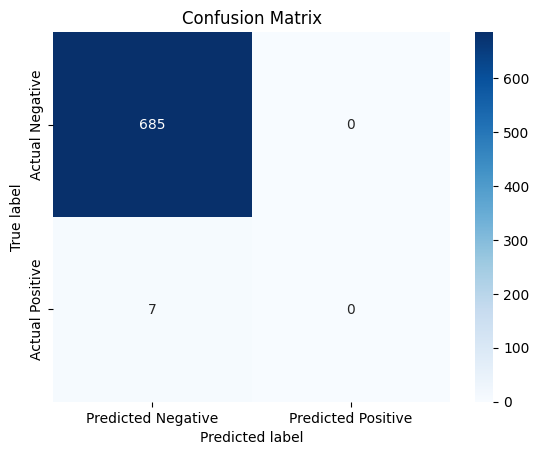

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()